![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [3]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
netflix_df.info()
# netflix_df.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [5]:
netflix_df['duration'].describe()

count    7787.000000
mean       69.122769
std        50.950743
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: duration, dtype: float64

In [6]:
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [7]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [8]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


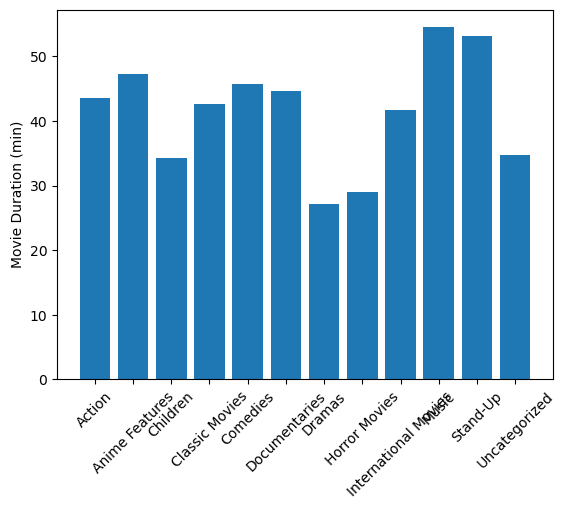

In [9]:
plt.bar(short_movies['genre'].dropna().sort_values().unique(), short_movies.groupby(['genre'])['duration'].mean().values)
plt.xticks(rotation=45)
plt.ylabel('Movie Duration (min)');

From the above, we don't see much of a clue regarding the difference in movie lengths by the average length for each movie genre after filtering the movies by those less than 60 min.

However, this may be skewed by the number of movies within each category. It's possible only a few examples from certain genres are present and are not representative of the entire genre.

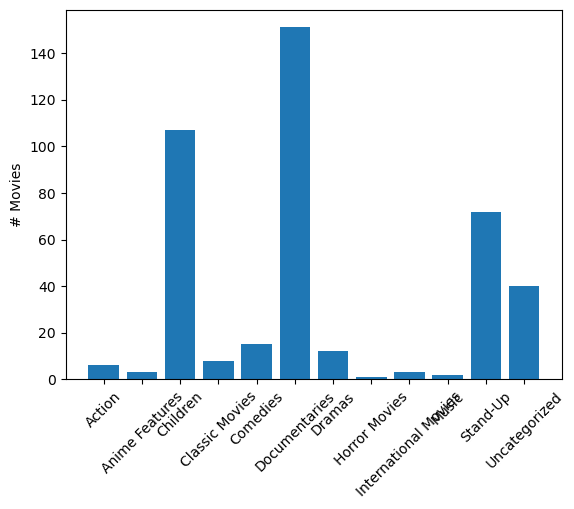

In [10]:
plt.bar(short_movies['genre'].dropna().sort_values().unique(), short_movies.groupby(['genre'])['duration'].count().values)
plt.xticks(rotation=45)
plt.ylabel('# Movies');

Here, we can see that is the case. It appears most of the movies that represent those less than 60 minutes are either children, stand-up, or documentary movies.

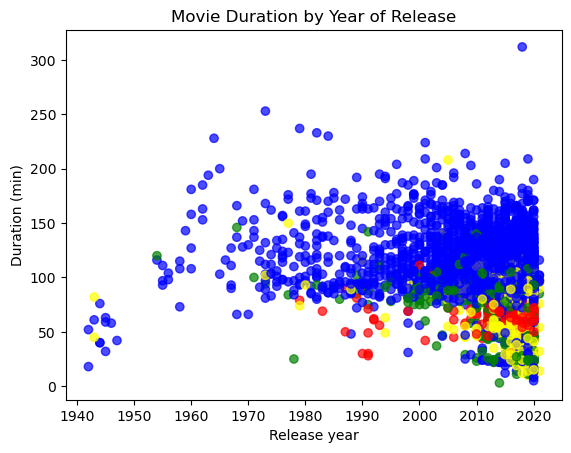

In [26]:
colors = [] # Satisfy the submission requirement - otherwise use the map function below

netflix_movies.loc[~netflix_movies['genre'].isin(['Children', 'Documentaries', 'Stand-Up']), 'genre'] = 'Other'

# netflix_movies['color'] = netflix_movies['genre'].map({'Children': 'green', 'Stand-Up': 'red', 'Documentaries': 'yellow', 'Other': 'blue'})
for i, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('green')
    elif row['genre'] == 'Stand-Up':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('yellow')
    else: # row['genre'] == 'Other' -> True
        colors.append('blue')
        
fig, ax = plt.subplots()
ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.7) # c=netflix_movies['color'] if using the map function
ax.set_xlabel('Release year')
ax.set_ylabel('Duration (min)')
ax.set_title('Movie Duration by Year of Release');

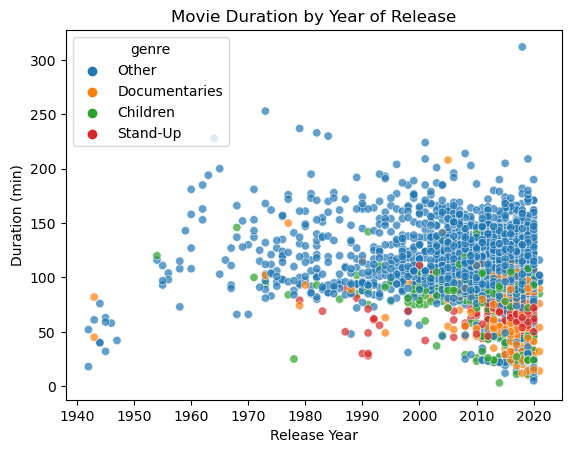

In [12]:
import seaborn as sns

ax = sns.scatterplot(x='release_year', y='duration', hue='genre', data=netflix_movies, alpha=0.7)
ax.set(xlabel='Release Year', ylabel='Duration (min)', title='Movie Duration by Year of Release');

In [13]:
answer='no'

## Additional Evaluation

If we go back to all the movies (not just the short movies), we see that the genres of interest are  much shorter, on average.

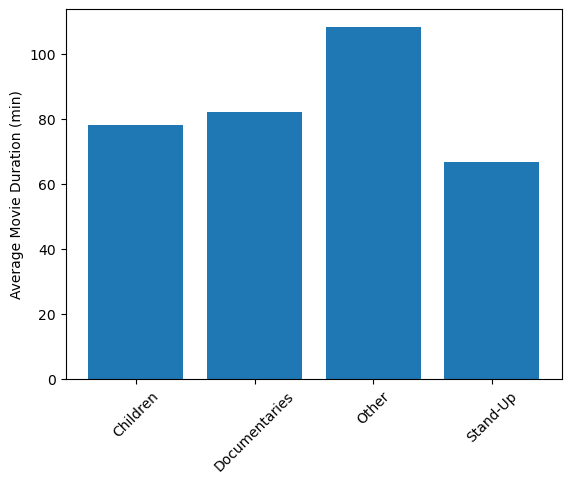

In [14]:
plt.bar(netflix_movies['genre'].dropna().sort_values().unique(), netflix_movies.groupby(['genre'])['duration'].mean().values)
plt.xticks(rotation=45)
plt.ylabel('Average Movie Duration (min)');

The below is an average aggregation of duration over all movies by year.

In [15]:
netflix_df.groupby(['release_year'])['duration'].mean()

release_year
1925     1.000000
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
          ...    
2017    70.213439
2018    63.553970
2019    55.382530
2020    43.440092
2021    32.193548
Name: duration, Length: 73, dtype: float64

Text(0.5, 1.0, 'Change in Movie Duration by Year')

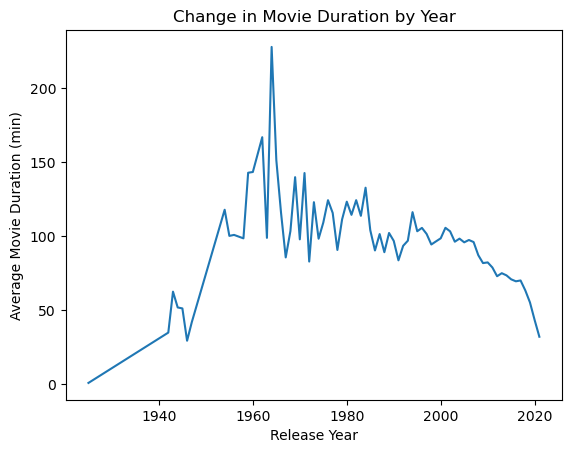

In [18]:
plt.plot(netflix_df.groupby(['release_year'])['duration'].mean())
plt.xlabel('Release Year')
plt.ylabel('Average Movie Duration (min)')
plt.title('Change in Movie Duration by Year')

Since about 2000, it appears there has been a steady decline in movie duration. However, that could be due to sampling error, or it could be true that the number of children movies and documentaries has increased pulling the average down.

c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ryanj\miniconda3\envs\ds-learning\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


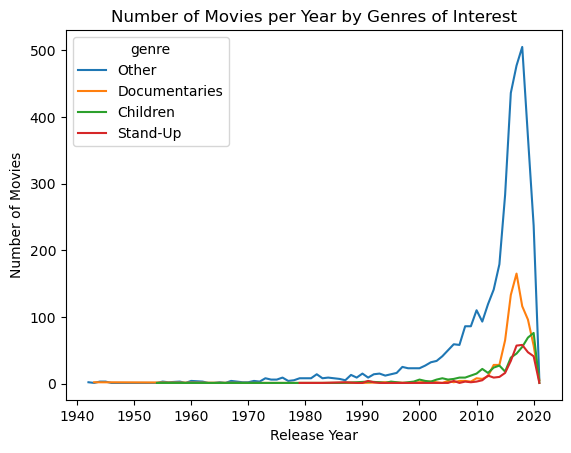

In [25]:
ax = sns.lineplot(data=netflix_movies.groupby(['release_year', 'genre'])['genre'].count().reset_index(name='Number of Movies'), x='release_year', y='Number of Movies', hue='genre')
ax.set(xlabel='Release Year', title='Number of Movies per Year by Genres of Interest');

While there is a growth in the number of movies associated with genres with a short average length, there is also an explosion in the number of movies from the 'Other' category. Furhter investigation into the sharp decline could be necessary. Maybe data stopped being collected or an external factor is the cause (e.g., COVID).